# Titanic example (a.m. session)

This notebook contains the code we went through to predict whether someone will survive the Titanic wreck or not.

First, I import the specific libraries I'll need:

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Here I'm importing the data:

In [2]:
df = pd.read_csv('datasets/train.csv')

Here I'm checking for missing values:

In [3]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

What's the average survival rate for people whose ages are missing?

In [4]:
df[df['age'].isnull()]['survived'].mean()

0.2937853107344633

What's the average survival rate for people whose ages aren't missing?

In [5]:
df[df['age'].notnull()]['survived'].mean()

0.4061624649859944

That's a pretty big difference -- we definitely don't want to drop people whose ages are missing. Create a dummy column to indicate people whose ages are missing:

In [6]:
df['age_isnull'] = [int(each) for each in df['age'].isnull()]

## Modeling

Setting up X and y:

In [7]:
X = df[['age', 'age_isnull', 'fare', 'pclass']]
y = df['survived']

Creating the model:

In [8]:
lr = LogisticRegressionCV()

lr.fit(X.fillna(0), y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Scoring the model:

In [9]:
lr.score(X.fillna(0), y)

0.7081930415263749

Interpreting coefficients:

In [10]:
pd.DataFrame({'coefs': X.columns,
             'vals': lr.coef_[0]})

,coefs,vals
0,age,-0.020698
1,age_isnull,-0.466561
2,fare,0.006647
3,pclass,-0.675566


## Visualization examples

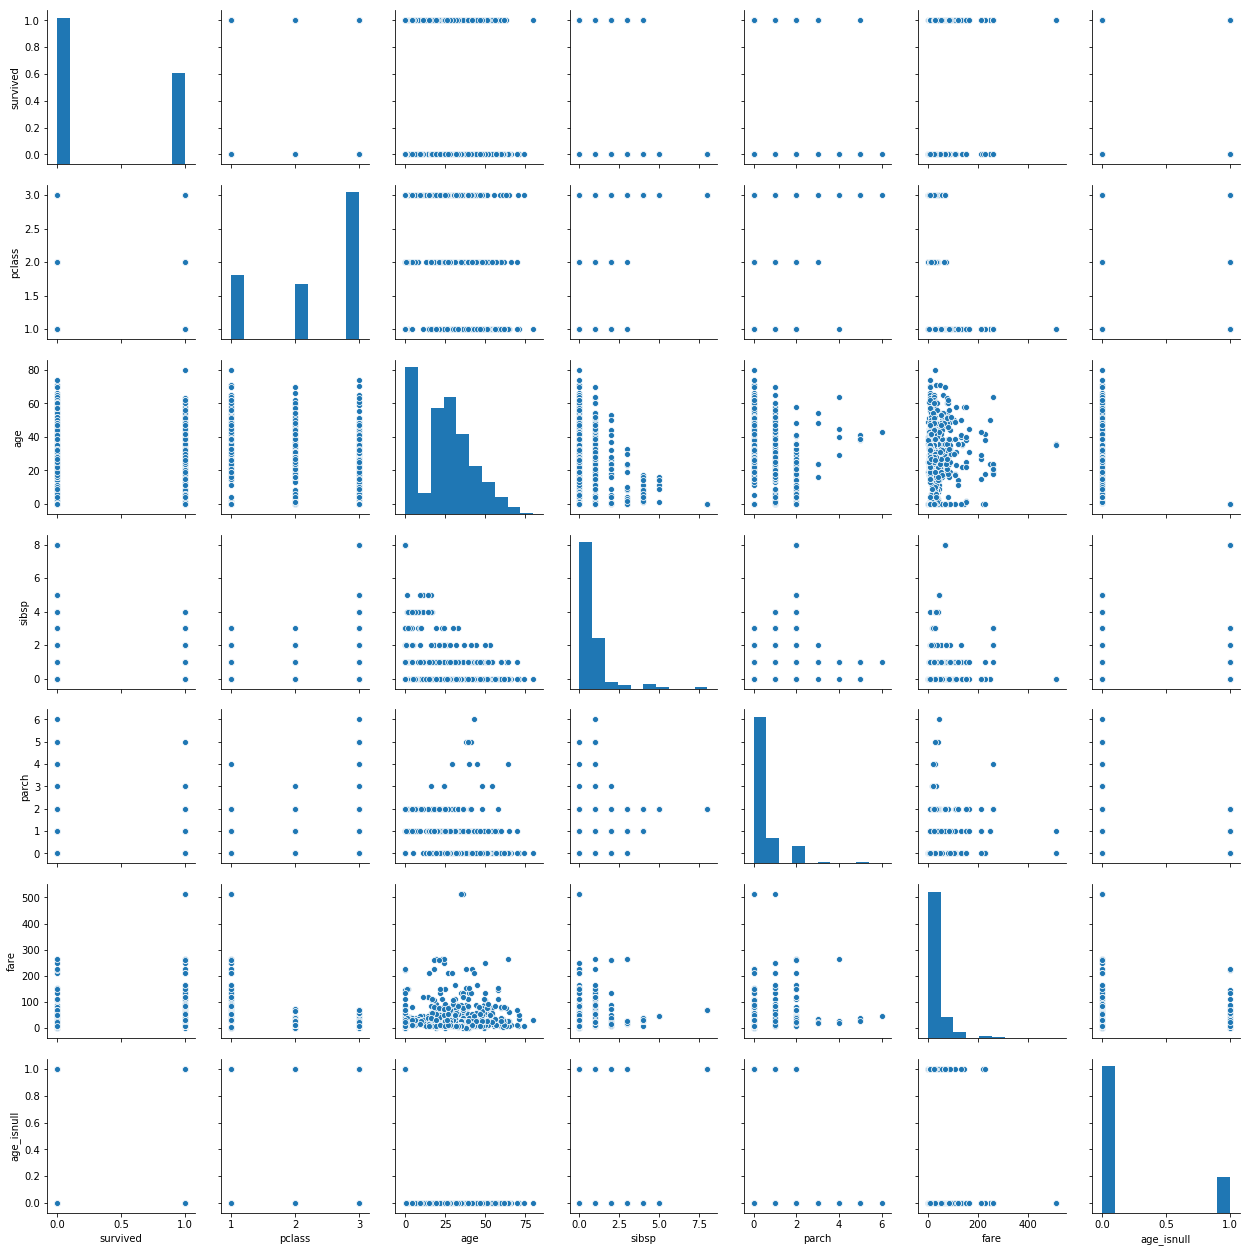

In [11]:
sns.pairplot(df.fillna(0));

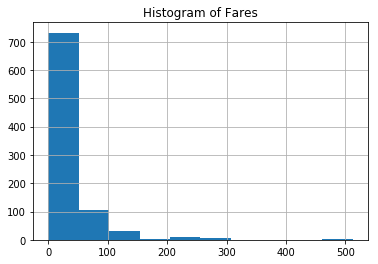

In [12]:
df['fare'].fillna(0).hist()
plt.title('Histogram of Fares');

If we want to store predictions as a column:

In [13]:
preds = lr.predict(X.fillna(0))

In [14]:
df['preds'] = preds
df.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_isnull,preds
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0


What's our baseline accuracy?

In [15]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

We can also use groupbys to grab summary statistics:

In [16]:
df.groupby('survived').mean()#[['fare']]

,pclass,age,sibsp,parch,fare,age_isnull,preds
survived,,,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887,0.227687,0.114754
1,1.950292,28.343690,0.473684,0.464912,48.395408,0.152047,0.423977


How many people boarded at each port?

In [17]:
df.dropna(subset=['embarked']).groupby('embarked').count()['preds']

embarked
C    168
Q     77
S    644
Name: preds, dtype: int64

Creating a titles column:

In [18]:
df['title'] = [each.split(',')[1].split('.')[0].strip() for each in df['name']]

In [19]:
df['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Don               1
Jonkheer          1
Mme               1
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Name: title, dtype: int64

Creating dummy columns for `title` and `embarked`:

In [20]:
pd.get_dummies(df, columns=['title', 'embarked'])

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess,embarked_C,embarked_Q,embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,1,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,1,0,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,1,0,0,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,1,0,0,0,0,0,0,0,1
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,...,0,1,0,0,0,0,0,0,1,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,...,0,1,0,0,0,0,0,0,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,...,0,0,0,0,0,0,0,0,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,...,0,0,1,0,0,0,0,0,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,...,0,0,1,0,0,0,0,1,0,0


Correlation heatmap:

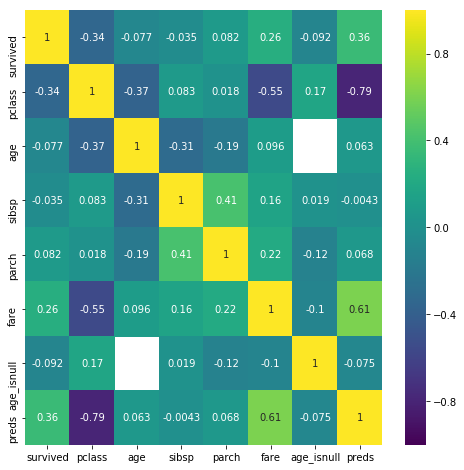

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),
           cmap='viridis',
           vmin=-1,
           annot=True)

Scatterplot with a trend line from seaborn:

/Users/dsi/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


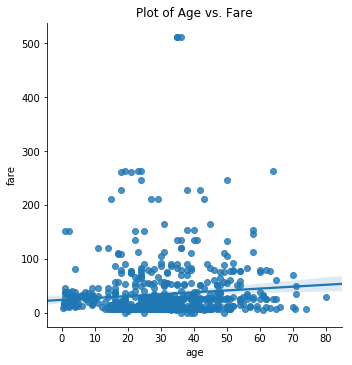

In [22]:
plt.figure(figsize=(6,4))
sns.lmplot('age', 'fare', data=df)
plt.xlabel('age')
plt.ylabel('fare')
plt.title('Plot of Age vs. Fare');